#### Predicting Personality of a person based on features like openness, agreeableness among others
>Dataset - https://github.com/vidushi4/Personality-prediction-system/blob/master/train%20dataset.csv

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression





Reading Data

In [2]:
data =pd.read_csv('Personality-prediction-system/train dataset.csv')


In [3]:
data.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Gender                     709 non-null    object
 1   Age                        709 non-null    int64 
 2   openness                   709 non-null    int64 
 3   neuroticism                709 non-null    int64 
 4   conscientiousness          709 non-null    int64 
 5   agreeableness              709 non-null    int64 
 6   extraversion               709 non-null    int64 
 7   Personality (Class label)  709 non-null    object
dtypes: int64(6), object(2)
memory usage: 44.4+ KB


In [5]:
data.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,19.685472,5.019746,4.647391,4.643159,4.827927,4.409027
std,2.510672,1.519052,1.658673,1.703569,1.632564,1.567404
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,4.000000,3.000000,4.000000,3.000000
50%,19.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,21.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,8.000000,8.000000,8.000000,7.000000


In [6]:
data.nunique()

Gender                        3
Age                          13
openness                      8
neuroticism                   8
conscientiousness             8
agreeableness                 8
extraversion                  7
Personality (Class label)     5
dtype: int64

In [7]:
#checking for null values
data.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (Class label)    0
dtype: int64

No null values, dataset is clean

Plotting correlationn betweeen features

In [8]:
from sklearn.preprocessing import LabelEncoder


<AxesSubplot:>

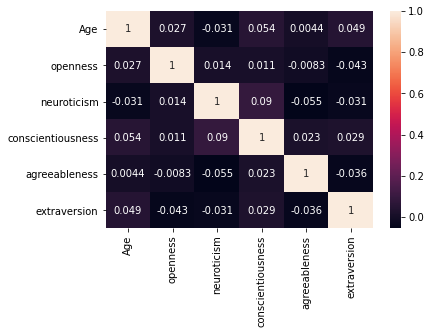

In [9]:
correlation = data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

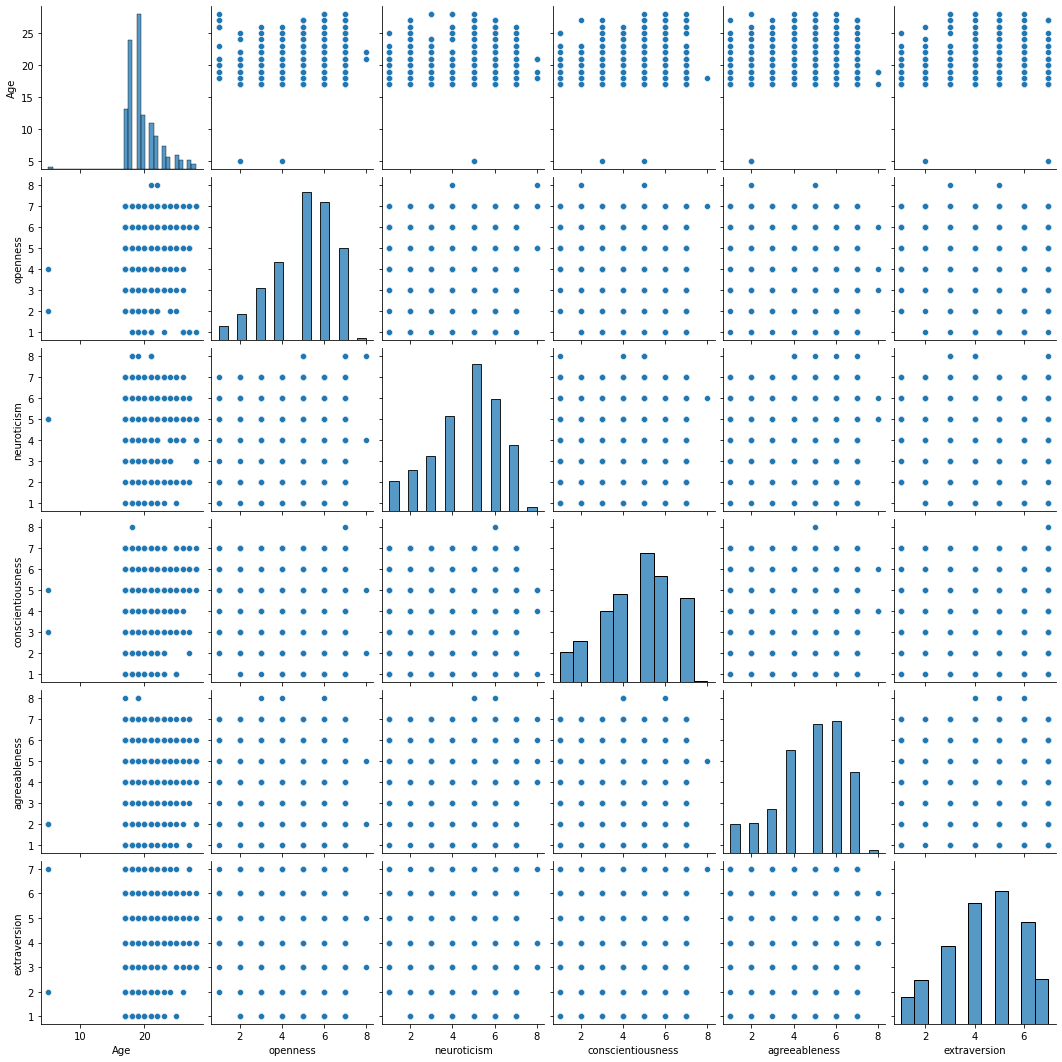

In [10]:
sns.pairplot(data)


/home/sri/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

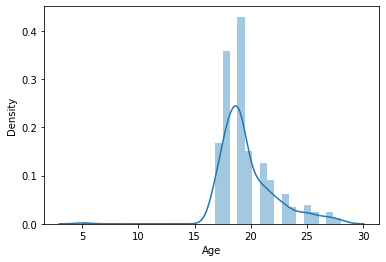

In [11]:
#plotting distribution
sns.distplot(data.iloc[:,1])


Training classification model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# from sklearn.svm import LinearSVC
# from sklearn.ensemble import RandomForestClassifier #training a RFC


In [13]:
#encoding class names to labels

class_dict = {}
for i,x in enumerate(data['Personality (Class label)'].unique()):
    class_dict[x] = i

gender_dict = {}
for i,x in enumerate(data['Gender'].unique()):
    gender_dict[x] = i

In [14]:
data['Personality (Class label)'] = data['Personality (Class label)'].map(class_dict)

data['Gender'] = data['Gender'].map(gender_dict)

In [27]:
clf = LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter =1000)
# clf = LinearSVC()

In [28]:
X ,y = data.iloc[:,0:-1],data.iloc[:,-1]
clf.fit(X, y)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

In [29]:
#test data 
testdata =pd.read_csv('Personality-prediction-system/test dataset.csv')

In [30]:
testdata

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible
...,...,...,...,...,...,...,...,...
310,Female,19,6,5,6,4,3,extraverted
311,Male,18,2,5,8,3,7,dependable
312,Male,18,7,5,6,2,7,serious
313,Male,23,6,7,5,4,3,extraverted


In [31]:
testdata['Personality (class label)'] = testdata['Personality (class label)'].map(class_dict)

testdata['Gender'] = testdata['Gender'].map(gender_dict)

X_test,y_test = testdata.iloc[:,0:-1],testdata.iloc[:,-1]

In [32]:
y_pred = clf.predict(X_test)

In [33]:
y_test

0      2
1      1
2      1
3      1
4      4
      ..
310    0
311    2
312    1
313    0
314    0
Name: Personality (class label), Length: 315, dtype: int64

In [34]:
result = []
for i in y_pred:
    for key in class_dict.keys():
        if class_dict[key] == i:
            result.append(key)
    

In [35]:
testdata.iloc[:,-1]

0      2
1      1
2      1
3      1
4      4
      ..
310    0
311    2
312    1
313    0
314    0
Name: Personality (class label), Length: 315, dtype: int64

In [36]:
y_pred

array([2, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 3, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 4, 1, 3, 0, 3, 1, 1, 1, 1, 0, 1, 4, 4, 1, 3,
       1, 1, 4, 2, 1, 0, 1, 1, 1, 3, 0, 1, 0, 1, 1, 1, 4, 1, 2, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 3, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 3, 1, 1, 0, 1, 1, 1, 0, 3, 3, 1, 1, 3, 1, 1, 1, 4, 1, 1, 2,
       1, 1, 2, 1, 4, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 3, 0, 0,
       1, 4, 0, 1, 0, 4, 0, 1, 1, 1, 4, 1, 0, 0, 0, 1, 1, 1, 4, 4, 1, 1,
       3, 1, 1, 1, 3, 1, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 1, 3, 1, 0, 1, 0,
       4, 1, 1, 0, 3, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 3, 0, 0, 2, 1, 2,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 4, 0, 1, 0, 1, 0, 1, 4, 4, 0, 3, 1, 4, 4, 3, 3,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 4, 4, 0, 0, 1, 1, 4, 0, 1, 0, 3, 2,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [37]:
print(classification_report(testdata.iloc[:,-1],y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        77
           1       0.85      0.93      0.89       153
           2       0.70      0.33      0.45        21
           3       0.86      0.75      0.80        24
           4       0.93      0.65      0.76        40

    accuracy                           0.84       315
   macro avg       0.83      0.72      0.75       315
weighted avg       0.84      0.84      0.83       315

